In [8]:
import qiskit, qiskit_ibm_runtime, qiskit_aer
print(qiskit.__version__, qiskit_ibm_runtime.__version__, qiskit_aer.__version__)

2.1.2 0.41.1 0.17.1


In [9]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [10]:


service = QiskitRuntimeService()

cands = service.backends(simulator=False, operational=True, min_num_qubits=6)
for b in cands: print(b.name, b.num_qubits)

A = service.least_busy(simulator=False, operational=True, min_num_qubits=6)
B = next(b for b in cands if b.name != A.name)
A, B

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-09-03 12:31:32,072: Default instance not set. Searching all available instances.


ibm_torino 133
ibm_brisbane 127


(<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>)

In [11]:
cfgA = A.configuration(); cfgB = B.configuration()
print("A basis_gates:", cfgA.basis_gates)
print("B basis_gates:", cfgB.basis_gates)
cmapA = A.coupling_map; cmapB = B.coupling_map

A basis_gates: ['cz', 'id', 'rz', 'sx', 'x']
B basis_gates: ['ecr', 'id', 'rz', 'sx', 'x']


In [12]:
import graphviz
print(graphviz.version())


(13, 1, 2)


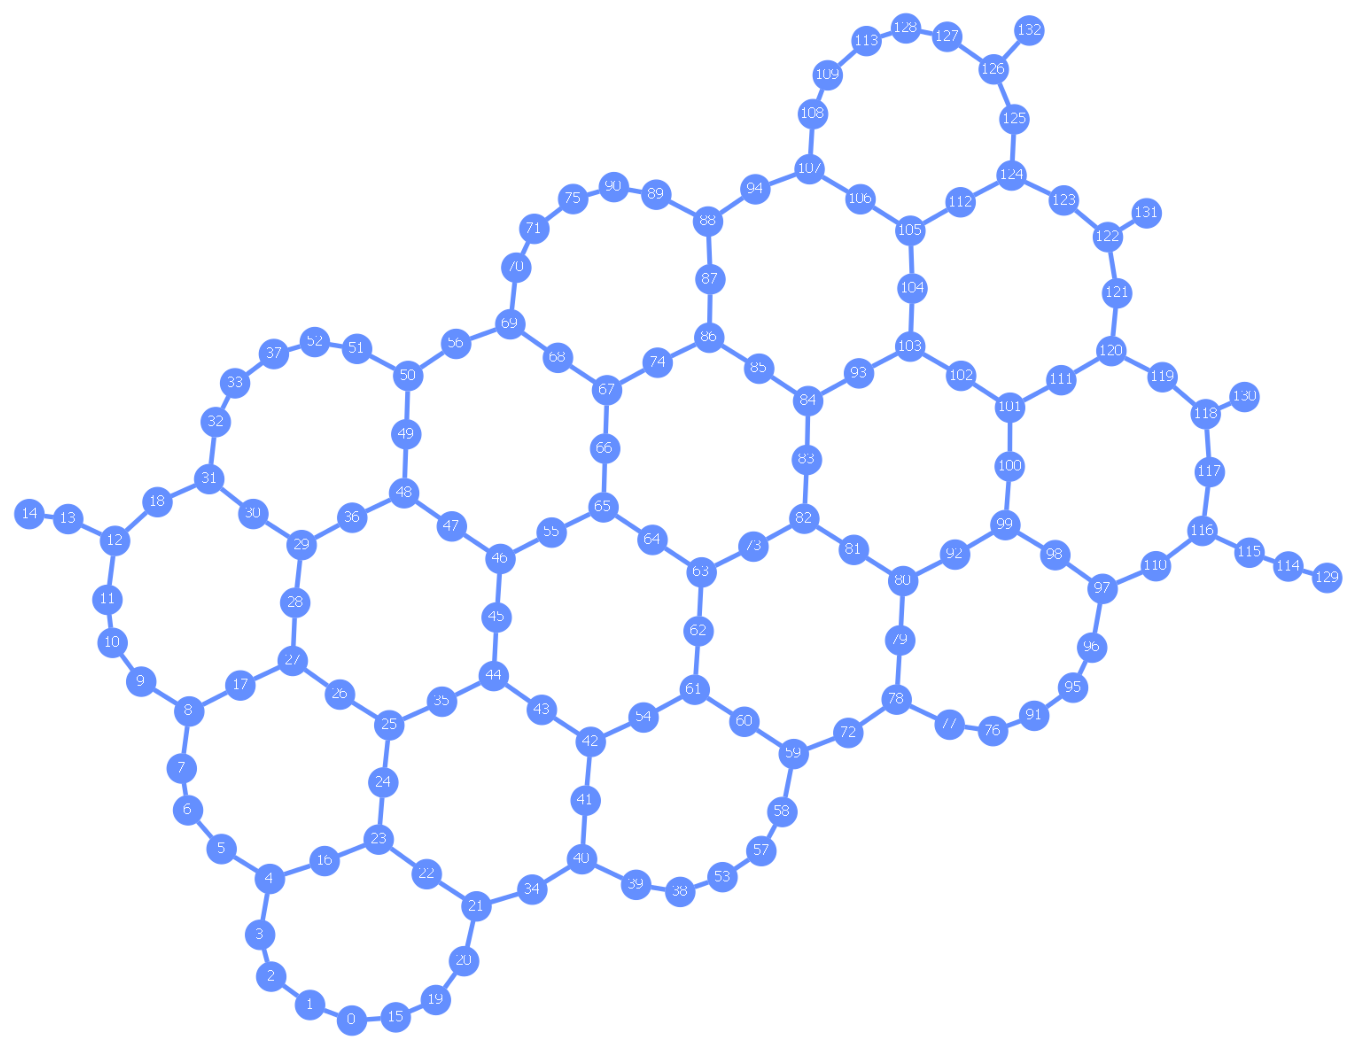

In [19]:
from qiskit.visualization import plot_coupling_map
plot_coupling_map(A.num_qubits, None, cmapA.get_edges())


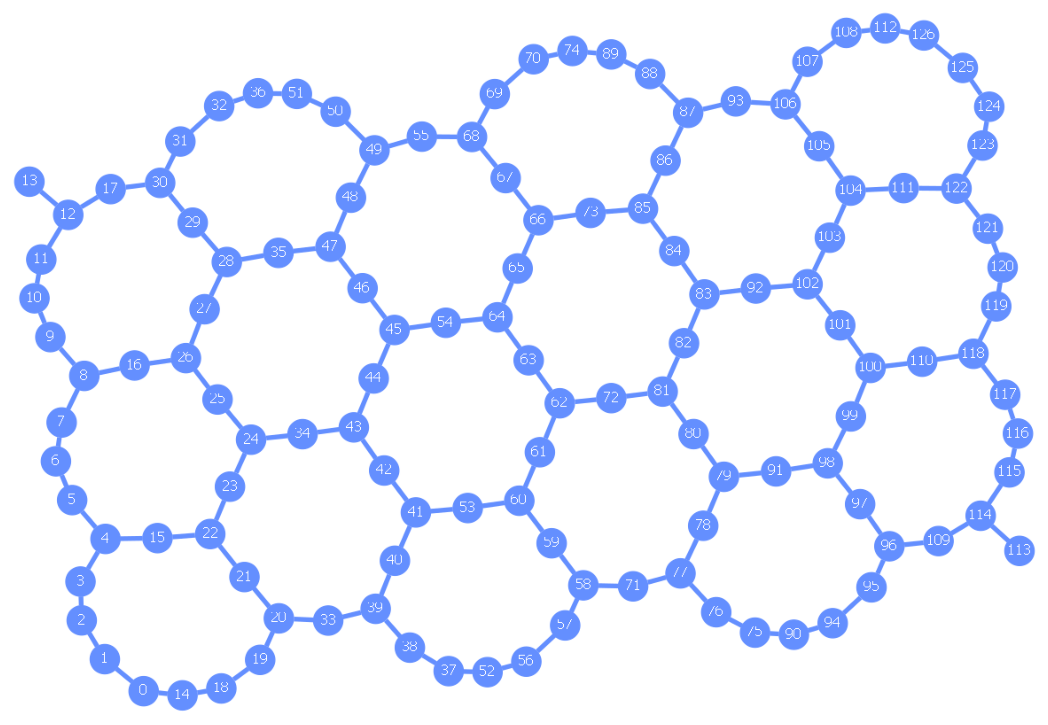

In [20]:
plot_coupling_map(B.num_qubits, None, cmapB.get_edges())

In [14]:
from qiskit import QuantumCircuit

# One‑bit QRNG
qc1 = QuantumCircuit(1)
qc1.h(0)          # coin‑flip on qubit 0
qc1.measure_all() # record the outcome as a classical bit
qc1.draw()

# k‑bit QRNG
def qrng(k: int):
    qc = QuantumCircuit(k)
    for q in range(k):
        qc.h(q)          # one coin‑flip per qubit
    qc.measure_all()
    return qc

k = 6
qc = qrng(k)
qc.draw()

┌───┐ ░ ┌─┐               
   q_0: ┤ H ├─░─┤M├───────────────
        ├───┤ ░ └╥┘┌─┐            
   q_1: ┤ H ├─░──╫─┤M├────────────
        ├───┤ ░  ║ └╥┘┌─┐         
   q_2: ┤ H ├─░──╫──╫─┤M├─────────
        ├───┤ ░  ║  ║ └╥┘┌─┐      
   q_3: ┤ H ├─░──╫──╫──╫─┤M├──────
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐   
   q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐
   q_5: ┤ H ├─░──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║ └╥┘
meas: 6/═════════╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5

In [18]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pmA = generate_preset_pass_manager(optimization_level=3, backend=A)
isaA = pmA.run(qc)

pmB = generate_preset_pass_manager(optimization_level=3, backend=B)
isaB = pmB.run(qc)

print("A ops:", isaA.count_ops(), "depth:", isaA.depth())
print("B ops:", isaB.count_ops(), "depth:", isaB.depth())

# (Optional) See which physical qubits were chosen for your logical qubits 0..k-1
print("ISA A initial_index_layout:", isaA.layout.initial_index_layout())
print("ISA A routing_permutation: ", isaA.layout.routing_permutation())
print("ISA A final_index_layout:  ", isaA.layout.final_index_layout())
print("ISA B final_index_layout:  ", isaB.layout.final_index_layout())

# (Optional) Peek at the device’s native gate names (you don't need to know them yet)
print("A basis gates:", A.configuration().basis_gates)
print("B basis gates:", B.configuration().basis_gates)
# Draw the transpiled circuit
isaA.draw()


A ops: OrderedDict({'rz': 12, 'sx': 6, 'measure': 6, 'barrier': 1}) depth: 4
B ops: OrderedDict({'rz': 12, 'sx': 6, 'measure': 6, 'barrier': 1}) depth: 4
ISA A initial_index_layout: [37, 125, 66, 127, 81, 92, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 129, 130, 131, 132]
ISA A routing_permutation:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,

global phase: 3π/2
           ┌─────────┐┌────┐┌─────────┐ ░ ┌─┐               
 q_0 -> 37 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤M├───────────────
           ├─────────┤├────┤├─────────┤ ░ └╥┘   ┌─┐         
 q_2 -> 66 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫────┤M├─────────
           ├─────────┤├────┤├─────────┤ ░  ║    └╥┘   ┌─┐   
 q_4 -> 81 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫─────╫────┤M├───
           ├─────────┤├────┤├─────────┤ ░  ║     ║    └╥┘┌─┐
 q_5 -> 92 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫─────╫─────╫─┤M├
           ├─────────┤├────┤├─────────┤ ░  ║ ┌─┐ ║     ║ └╥┘
q_1 -> 125 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫─┤M├─╫─────╫──╫─
           ├─────────┤├────┤├─────────┤ ░  ║ └╥┘ ║ ┌─┐ ║  ║ 
q_3 -> 127 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫──╫─┤M├─╫──╫─
           └─────────┘└────┘└─────────┘ ░  ║  ║  ║ └╥┘ ║  ║ 
   meas: 6/════════════════════════════════╩══╩══╩══╩══╩══╩═
                                           0  1  2  3  4  5

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler


# Hardware: target a specific backend
sampler = Sampler(mode=A) # or mode=B
result = sampler.run([isaA], shots=4000).result()
counts = result[0].data.meas.get_counts() # {'010011': n, ...}
total = sum(counts.values())
probs = {bitstr: count / total for bitstr, count in counts.items()}
print(len(counts))
print(counts)
print(total)
print(probs)



64
{'110110': 66, '111001': 67, '110111': 77, '011000': 74, '010011': 63, '000101': 65, '001110': 56, '011111': 56, '110000': 53, '111010': 51, '000100': 67, '000111': 61, '000110': 72, '010100': 67, '010101': 68, '101001': 63, '010001': 58, '100100': 62, '001011': 65, '010111': 62, '011001': 81, '100000': 64, '110101': 71, '100010': 47, '011011': 52, '010110': 49, '101100': 74, '100110': 60, '110011': 54, '011100': 58, '110001': 76, '111101': 70, '111000': 59, '000001': 71, '101110': 53, '100001': 73, '000010': 46, '001100': 53, '111011': 79, '100011': 65, '000000': 67, '101010': 48, '010000': 51, '001111': 62, '101011': 69, '101000': 63, '111110': 74, '100111': 73, '111100': 65, '111111': 72, '001101': 53, '001000': 52, '001001': 57, '101111': 66, '110010': 71, '010010': 56, '001010': 64, '110100': 54, '101101': 68, '000011': 54, '011101': 64, '011110': 55, '100101': 66, '011010': 48}
4000
{'110110': 0.0165, '111001': 0.01675, '110111': 0.01925, '011000': 0.0185, '010011': 0.01575, '

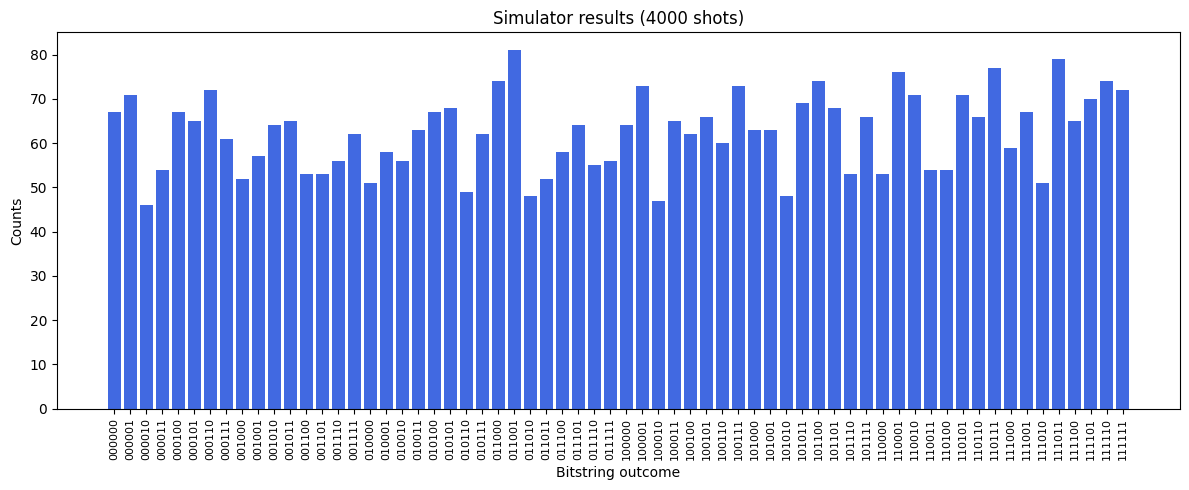

In [39]:
import matplotlib.pyplot as plt

def plot_counts(counts, title="Counts histogram"):
    # Sort outcomes by bitstring for consistent x-axis
    labels = sorted(counts.keys())
    values = [counts[k] for k in labels]

    plt.figure(figsize=(12,5))
    plt.bar(labels, values, color="royalblue")
    plt.xticks(rotation=90, fontsize=8)
    plt.xlabel("Bitstring outcome")
    plt.ylabel("Counts")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot your simulator results
plot_counts(counts, title="Simulator results (4000 shots)")


In [35]:
# Simulator with the same result schema
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator
sim_counts = BackendSamplerV2(backend=AerSimulator()).run([isaA], shots=4000).result()[0].data.meas.get_counts()
print(sim_counts)

{'100101': 53, '110010': 62, '000001': 62, '101001': 55, '000000': 62, '101110': 53, '001100': 64, '011011': 77, '010110': 68, '001011': 69, '101100': 65, '000110': 61, '001001': 72, '110001': 55, '111101': 67, '111110': 78, '110100': 59, '110111': 44, '001110': 65, '101101': 51, '101010': 59, '001010': 66, '100111': 63, '111100': 65, '011100': 69, '010011': 59, '000011': 61, '111010': 66, '100011': 81, '101111': 64, '111111': 49, '010101': 61, '100000': 60, '101000': 54, '011010': 61, '011001': 72, '100001': 48, '100010': 75, '010001': 61, '111001': 56, '010111': 50, '000111': 56, '111011': 57, '111000': 59, '010100': 78, '001111': 75, '011110': 60, '010010': 63, '110000': 64, '011111': 74, '011101': 48, '011000': 64, '000101': 61, '100110': 60, '110011': 65, '100100': 65, '001000': 63, '101011': 76, '110110': 53, '010000': 65, '110101': 58, '001101': 55, '000100': 75, '000010': 64}


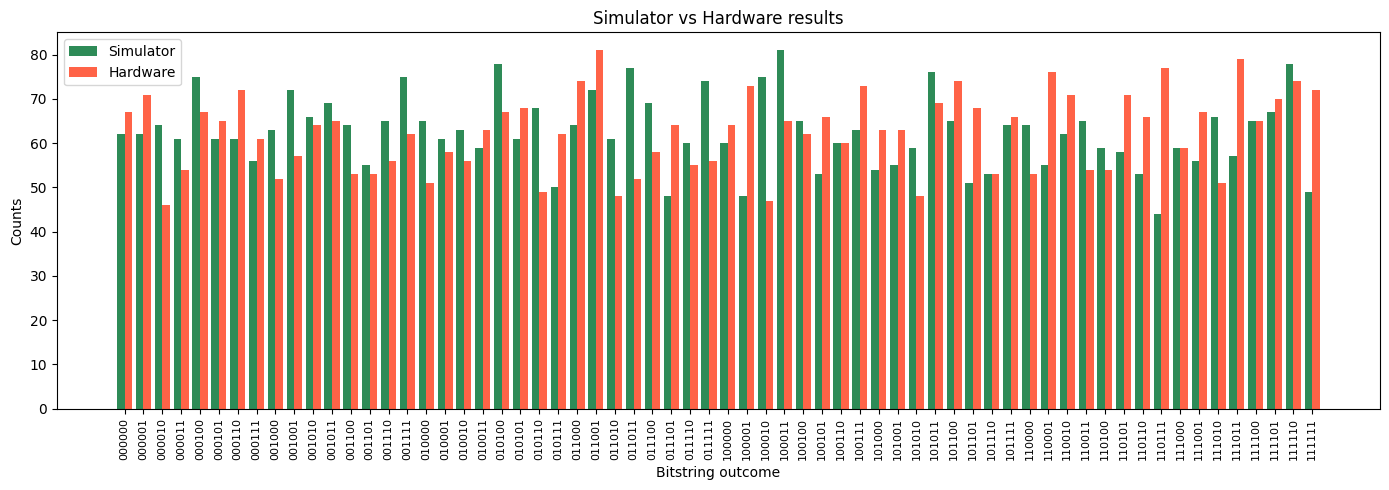

In [38]:
import matplotlib.pyplot as plt
def plot_compare(counts1, counts2, title1="Simulator", title2="Hardware"):
    labels = sorted(set(counts1.keys()).union(set(counts2.keys())))
    vals1 = [counts1.get(k,0) for k in labels]
    vals2 = [counts2.get(k,0) for k in labels]

    x = range(len(labels))
    width = 0.4

    plt.figure(figsize=(14,5))
    plt.bar([i-width/2 for i in x], vals1, width, label=title1, color="seagreen")
    plt.bar([i+width/2 for i in x], vals2, width, label=title2, color="tomato")
    plt.xticks(x, labels, rotation=90, fontsize=8)
    plt.xlabel("Bitstring outcome")
    plt.ylabel("Counts")
    plt.title("Simulator vs Hardware results")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example call
plot_compare(sim_counts, counts, "Simulator", "Hardware")



In [28]:
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator

  
# Sampled counts
sim_sampler = BackendSamplerV2(backend=AerSimulator())
sim_counts = sim_sampler.run([isaA], shots=4000).result()[0].data.meas.get_counts()